In [32]:
from A_Libraries import *
from A1_path import *
from B_GetData import get_imlist
from histEq import histeq

In [33]:
path = [trainingDataHEM, trainingDataALL]
imageList = []
for i in path:
    if i == trainingDataHEM:
        loadPath = get_imlist(i) 
        for paths in loadPath:
            imageList.append({'Images':Image.open(paths),'Labels':0})
    else:
        loadPath = get_imlist(i) 
        for paths in loadPath:
            imageList.append({'Images':Image.open(paths),'Labels':1})

In [34]:
imagesData = pd.DataFrame(imageList)

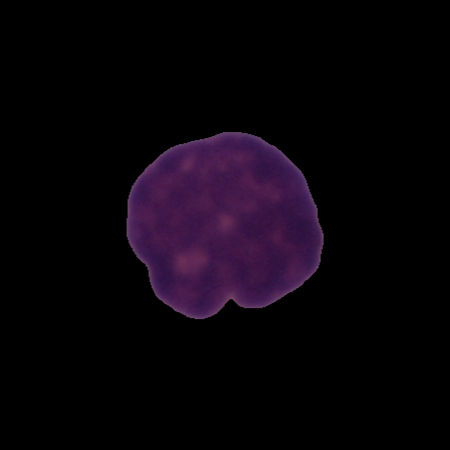

In [35]:
imagesData['Images'].iloc[0]

In [36]:
imagesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Images  3581 non-null   object
 1   Labels  3581 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.1+ KB


In [37]:
def load_images_labels_from_df(df, img_size):
    images = []
    labels = []
    
    for _, row in df.iterrows():
        label = row['Labels']
        img_data = row['Images']
        img_resized = img_data.resize((img_size, img_size))
        img_array = np.array(img_resized) / 255.0  # Normalize pixel values
        images.append(img_array)
        labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

img_size = 128
images, labels = load_images_labels_from_df(imagesData, img_size)

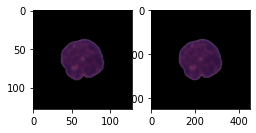

In [38]:
subplot(1,3,1)
imshow(images[0])

subplot(1,3,2)
imshow(imagesData['Images'].iloc[0])

In [39]:
images.shape

(3581, 128, 128, 3)

In [40]:
augmentation = preprocessing.image.ImageDataGenerator(
                                                        rotation_range=20,
                                                        width_shift_range=20,
                                                        height_shift_range=20,
                                                        shear_range=20,
                                                        zoom_range=20,
                                                        horizontal_flip=True,
                                                        fill_mode='nearest',
                                                        vertical_flip=True
                                                    )

In [42]:
xhat = augmentation.fit(images)

In [43]:
x = augmentation.random_transform(images[0])

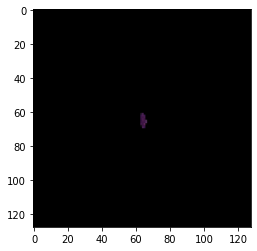

In [44]:
imshow(x)

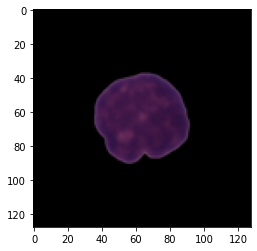

In [45]:
imshow(images[0])

In [46]:
# augmentation

In [47]:
augmentation.fit(images)

In [48]:
training_generator = augmentation.flow(images,labels,batch_size=32)